<a href="https://colab.research.google.com/github/Akshit7103/Akshit7103/blob/main/EDA_Digital_Assessment_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset
# Load the dataset from the specified path. Make sure the file path is correct.
file_path = '/content/1000 Sales Records.csv'  # Update path as necessary
df = pd.read_csv(file_path)

# Check the initial dimensions of the dataset to understand its size
print("Dataset Dimensions:", df.shape)

# Display basic information about the dataset including column names, data types, and non-null counts
df.info()

# Display the first few rows of the dataset to get an idea of the data format and values
df.head()


Dataset Dimensions: (1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [33]:
# 2. Identify and Handle Missing Values
# Check for missing values in each column of the dataset
print("Missing Values:\n", df.isnull().sum())

# If there are missing values, consider handling them.
# Here are two common methods (uncomment if necessary):
# df = df.fillna(method='ffill')  # Forward fill to handle missing values
# df = df.dropna()  # Drop rows with any missing values


Missing Values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [34]:
# 3. Data Cleaning - Removing Duplicate Rows
# Check for duplicate rows to avoid redundant data
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicate rows if any were found
df = df.drop_duplicates()
print("Dataset Dimensions after removing duplicates:", df.shape)


Number of duplicate rows: 0
Dataset Dimensions after removing duplicates: (1000, 14)


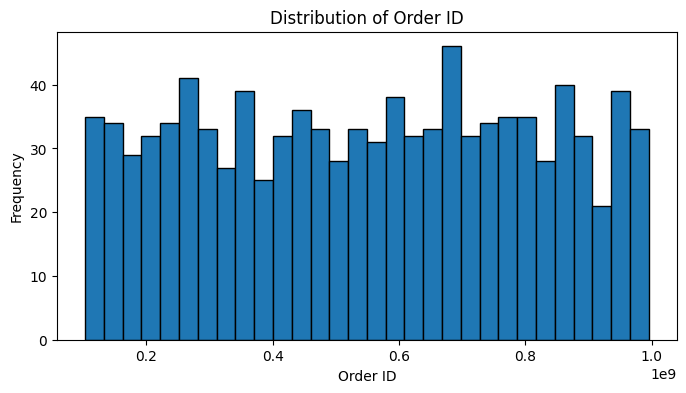

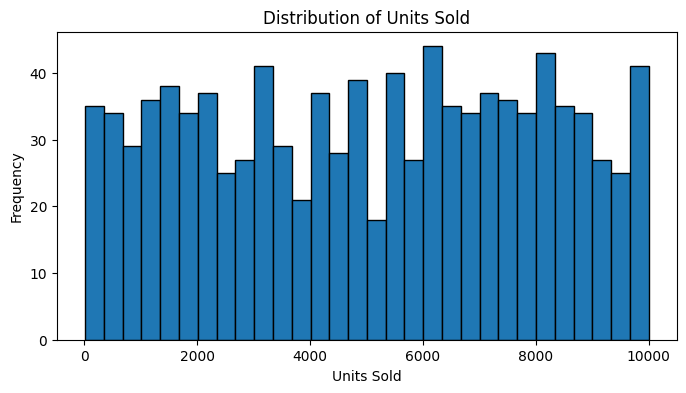

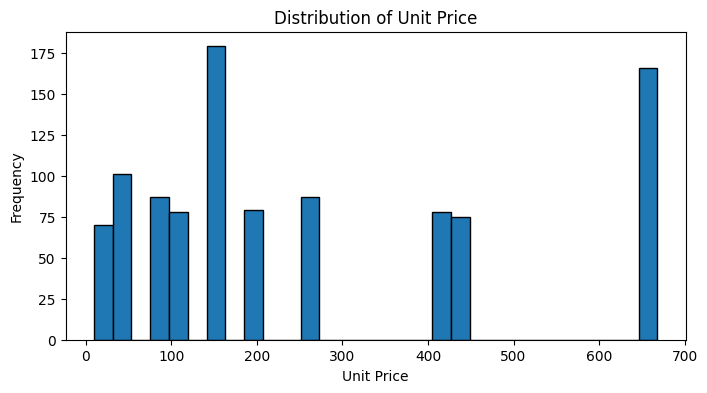

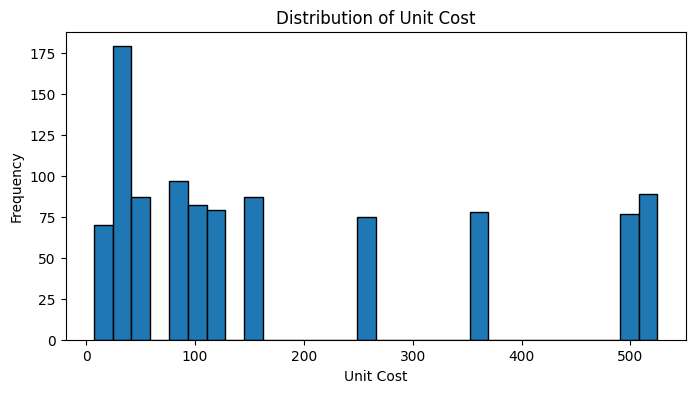

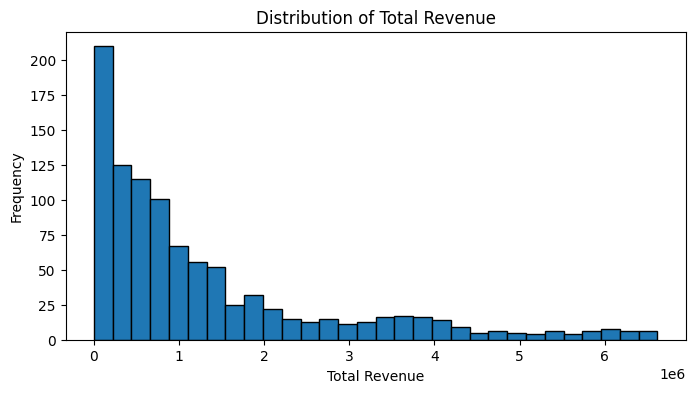

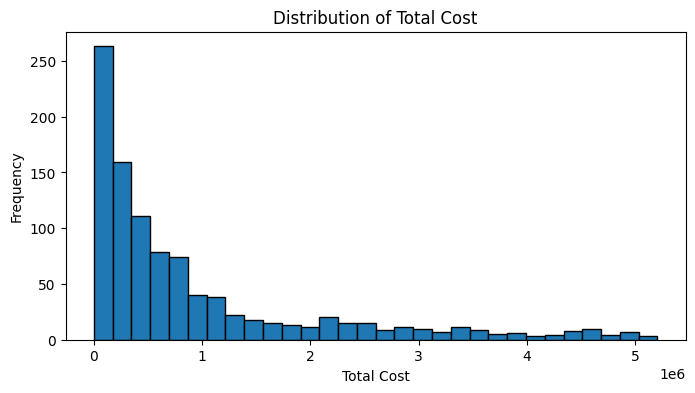

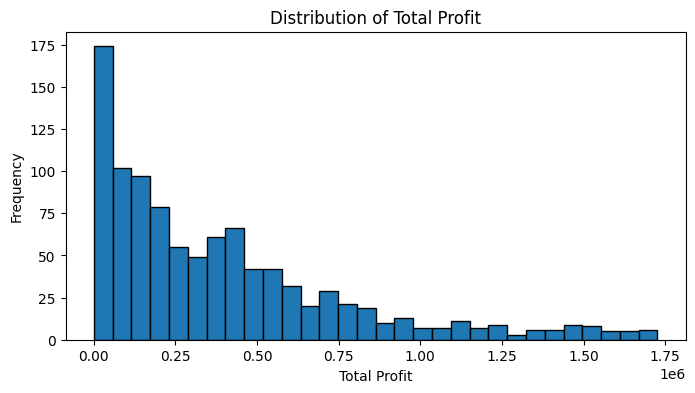

In [35]:
# 4. Univariate Analysis - Distribution of Individual Variables
# Plot histograms for each numerical column to visualize data distributions

# Select only numerical columns for univariate analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    # Observations can be noted here, for example:
    # - Identify skewness in certain columns
    # - Check for any outliers visually


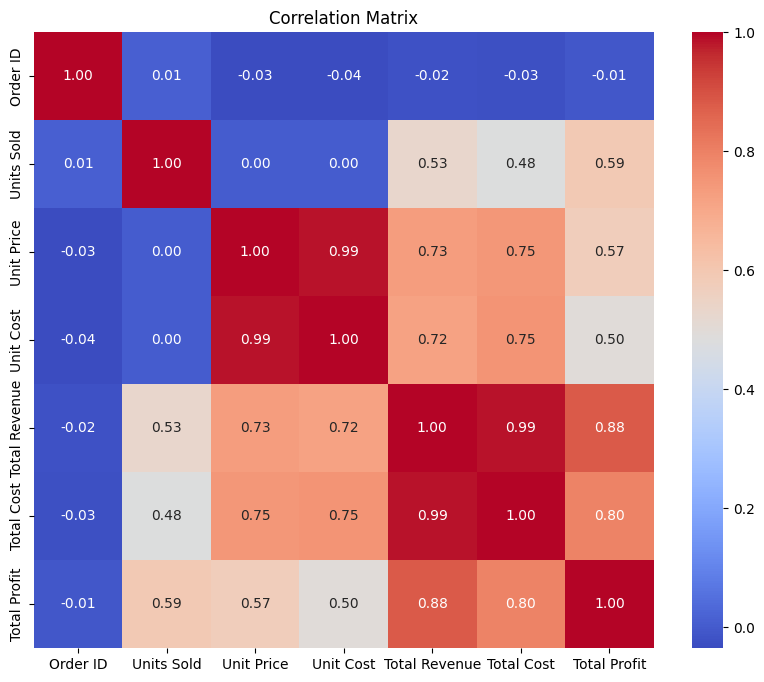

In [36]:
# 5. Bivariate Analysis - Correlation Matrix and Scatter Plot

# 5a. Correlation Matrix
# A correlation matrix shows relationships between numerical variables.
# Values close to 1 or -1 indicate strong relationships.

# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Observations:
# - High positive correlation values indicate a direct relationship between variables.
# - High negative correlation values indicate an inverse relationship.
# - Weak or zero correlation suggests no clear relationship.


Column Names: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


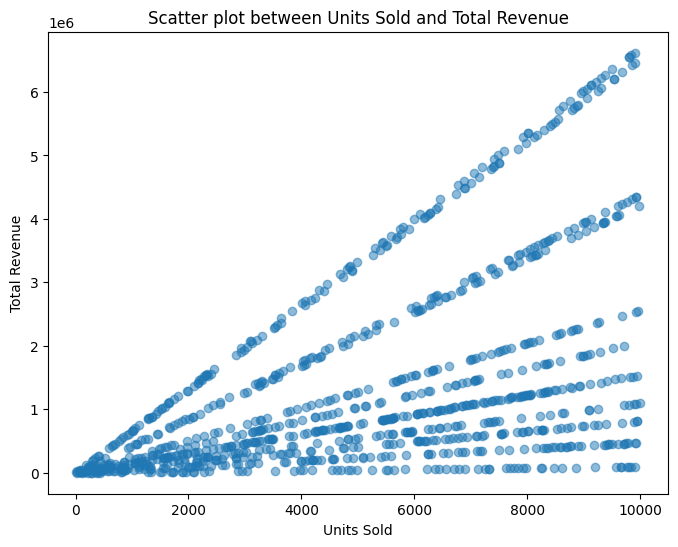

In [37]:
# 5b. Scatter Plot
# Scatter plots are useful to observe relationships between two specific variables.
# Replace 'Units Sold' and 'Total Revenue' with actual column names from your dataset.

# Check the column names in the dataset to decide which columns to plot
print("Column Names:", df.columns)

# Example scatter plot (replace 'Units Sold' and 'Total Revenue' with actual columns you choose to analyze)
plt.figure(figsize=(8, 6))
plt.scatter(df['Units Sold'], df['Total Revenue'], alpha=0.5)  # Replace columns as necessary
plt.title('Scatter plot between Units Sold and Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()

# Observations:
# - Look for linear or non-linear patterns between the two variables.
# - Observe any clusters, outliers, or trends in the data.


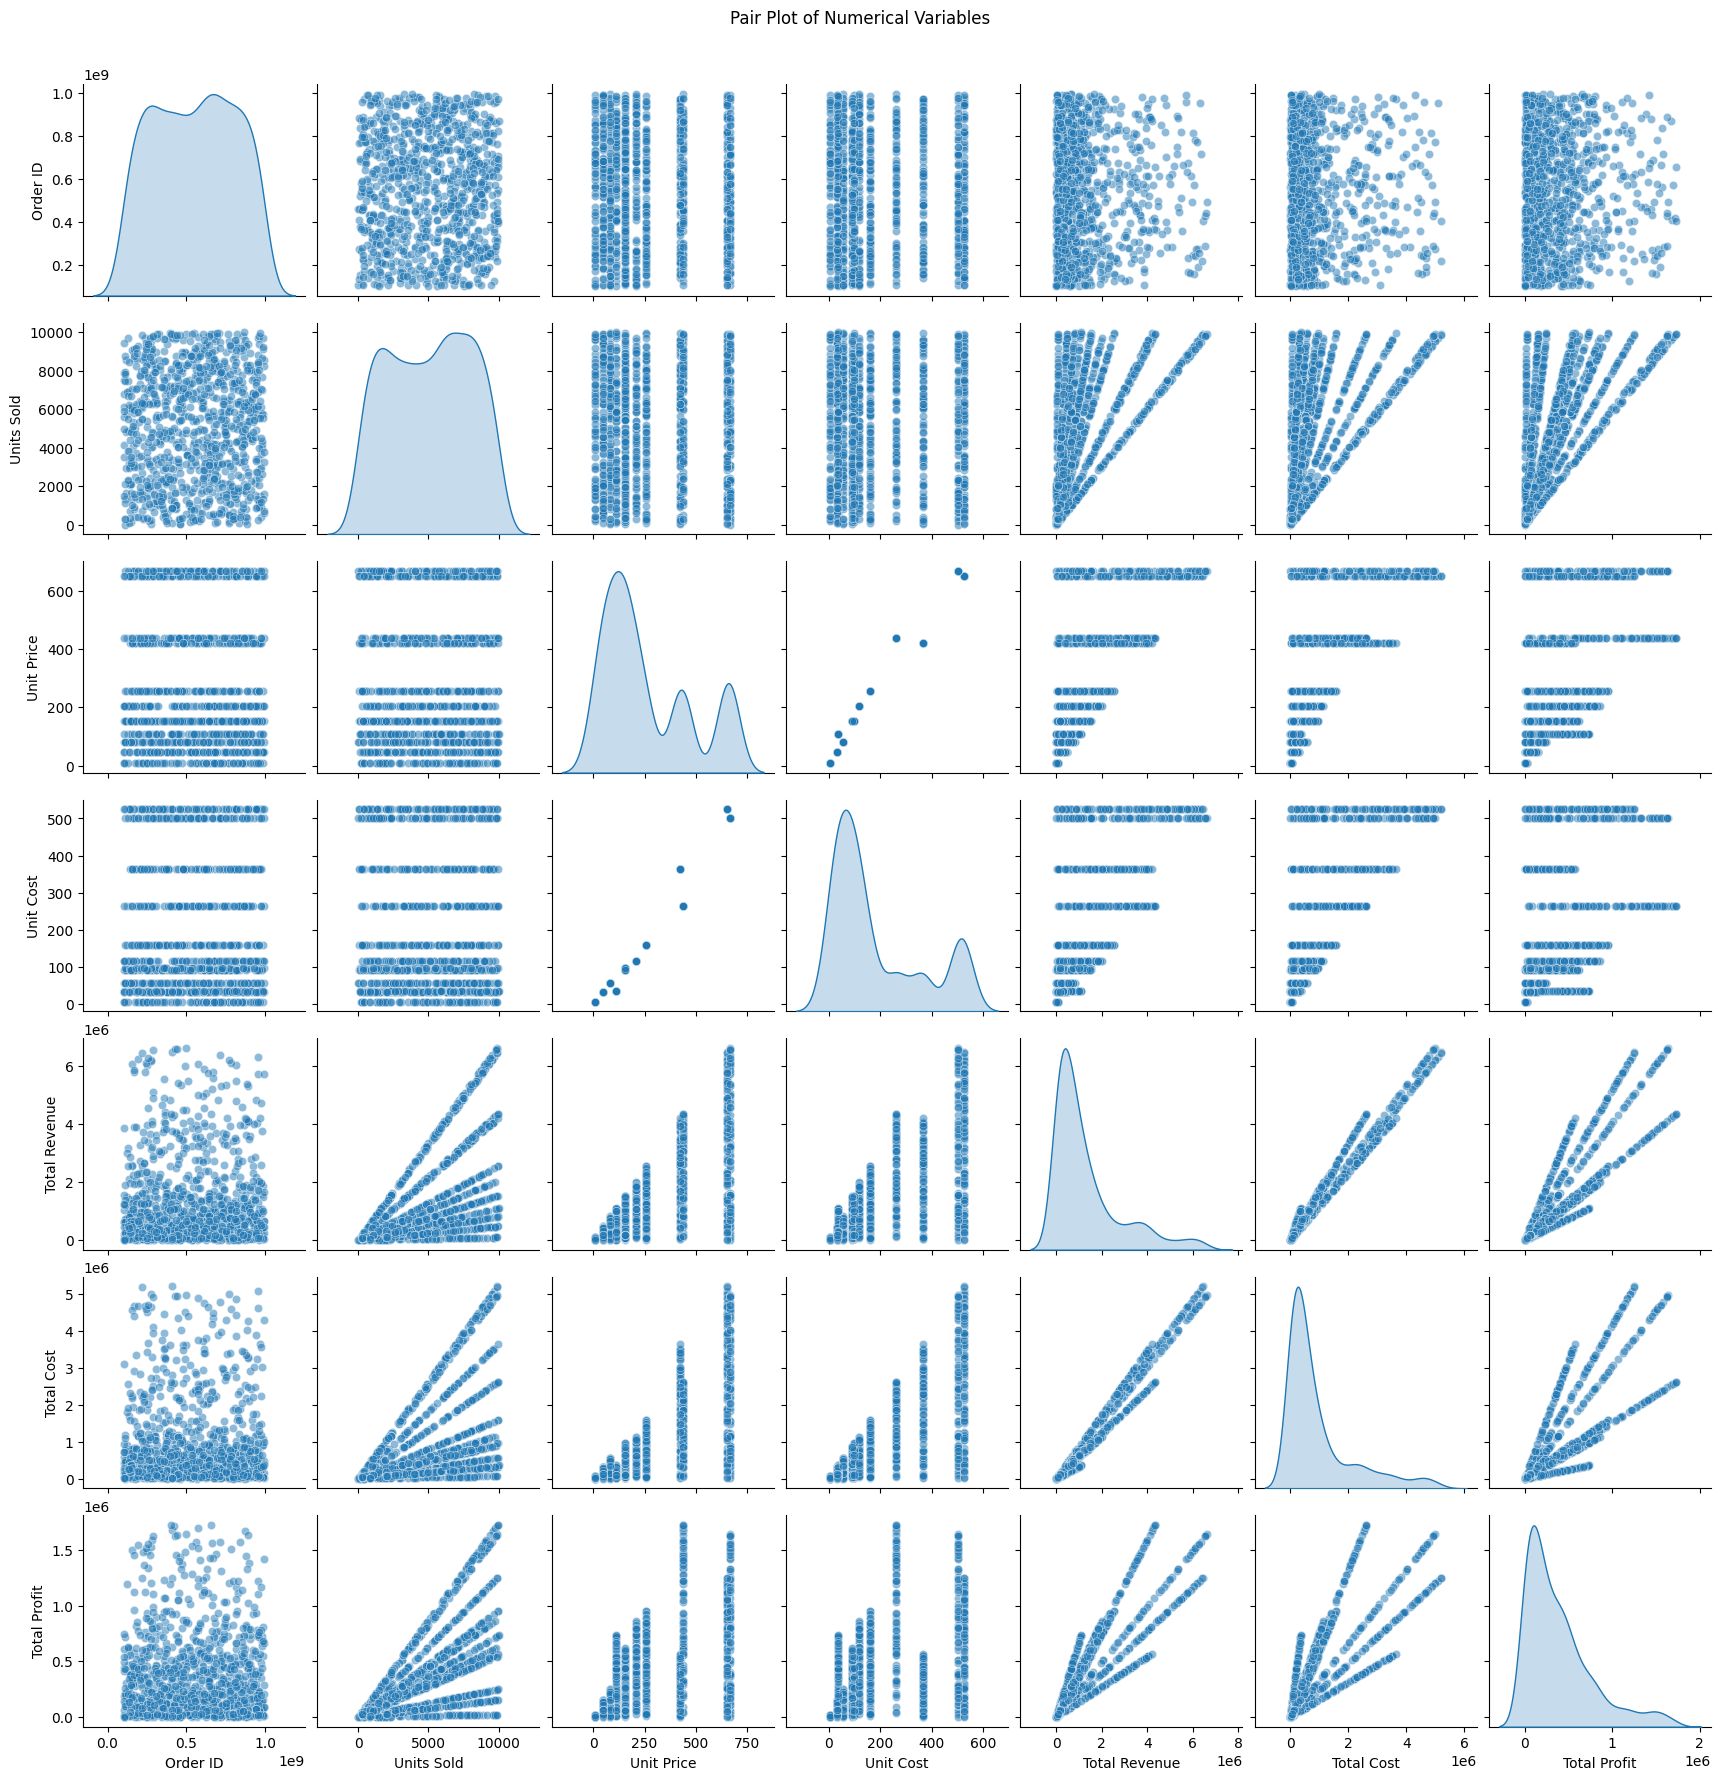

In [38]:
# 6. Multivariate Analysis - Pair Plot
# A pair plot displays relationships across multiple variables.
# It allows us to see scatter plots for pairs of variables and distributions for individual variables on the diagonal.

# Using only numerical columns for the pair plot to avoid errors
sns.pairplot(numerical_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

# Observations:
# - Look for relationships and patterns among multiple variables.
# - Pair plots can help identify clusters, trends, and outliers across multiple dimensions.


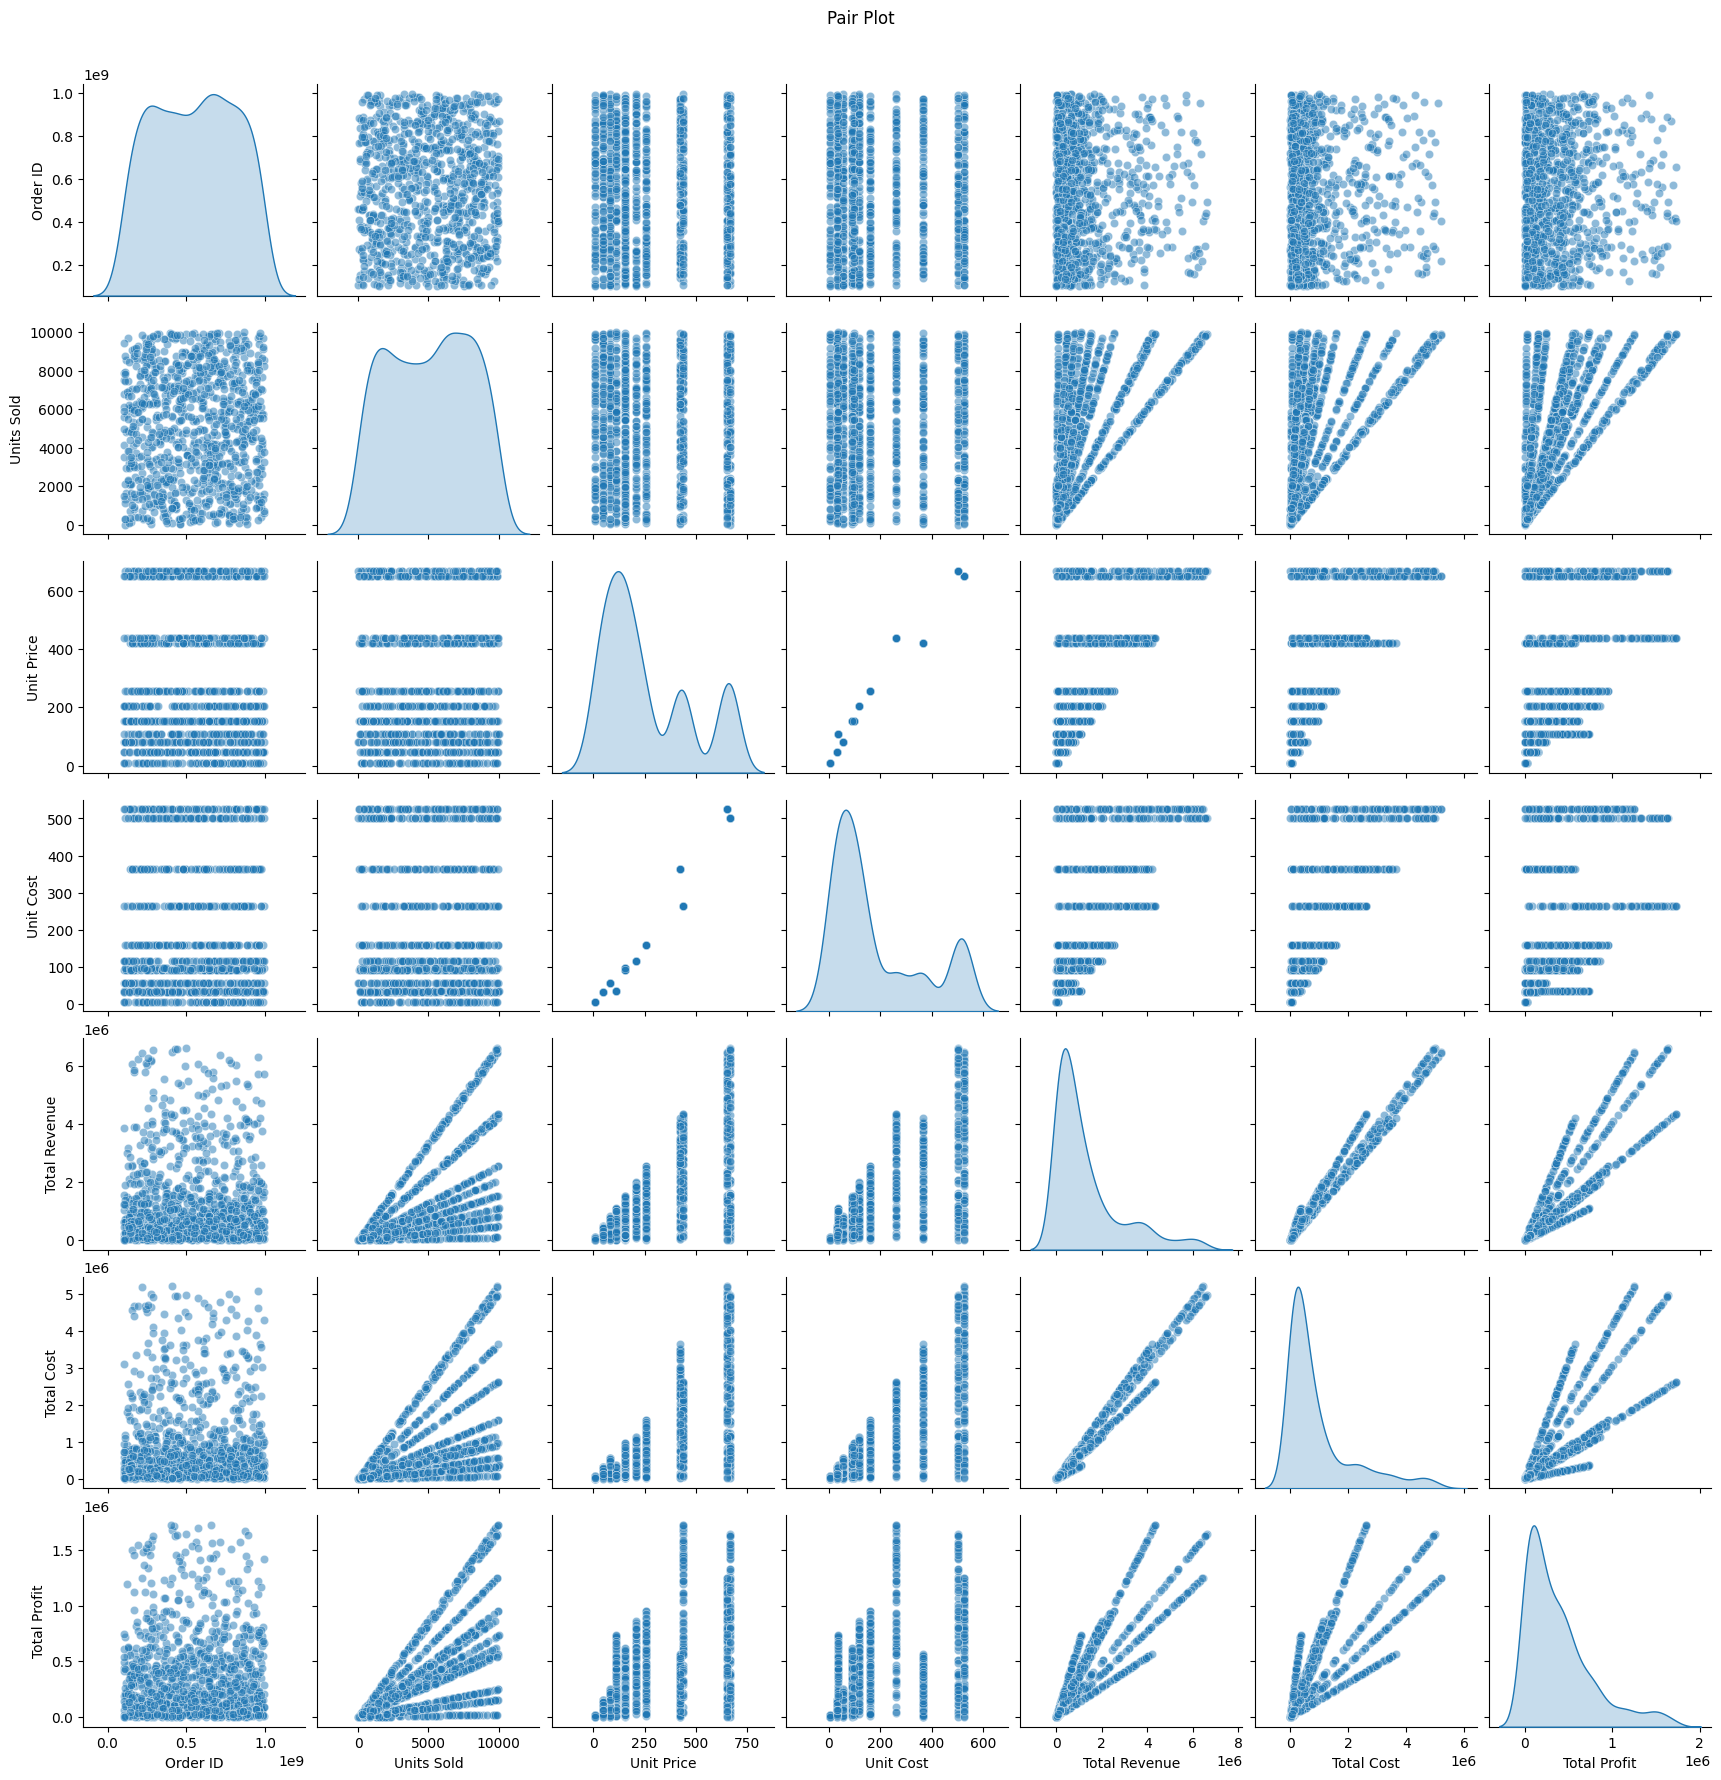

In [31]:
# Pair plot to explore relationships between multiple numerical variables
sns.pairplot(numerical_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot', y=1.02)
plt.show()
